## Analysing the performance of the model
In this notebook we're gonna analyse the performance of our model by loading some figures, going through the metrics and by examining figures of some ground truth saliency maps vs. predicted saliency maps.


In [10]:
# Import necessary libraries : 
import json
import matplotlib.pyplot as plt
from PIL import Image


 ## The model's Training epochs visualization 
For training the model (See the file "Linear_Probing), we used the Mean Squared Error (MSE) loss and the Adam optimizer. The training loops was iterated over 10 epochs.

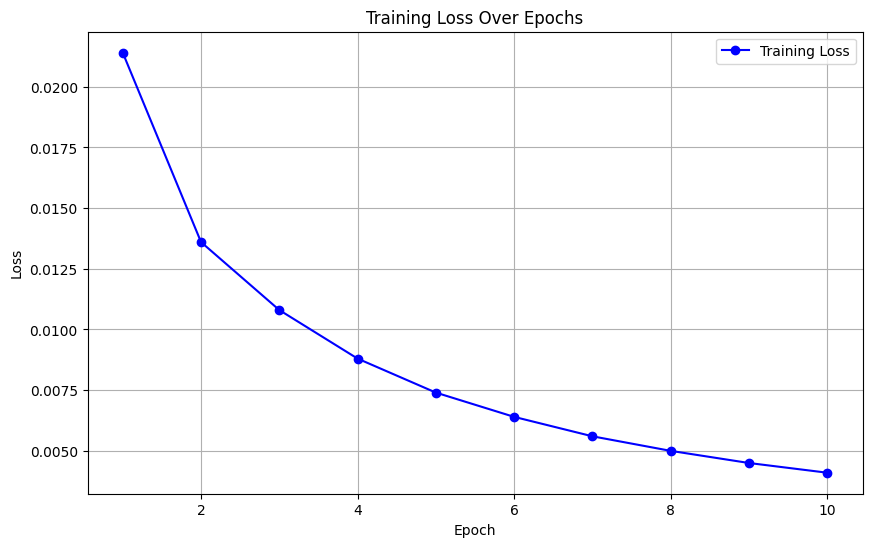

In [1]:

# List of epoch losses 
epoch_losses = [0.0214, 0.0136, 0.0108, 0.0088, 0.0074, 0.0064, 0.0056, 0.0050, 0.0045, 0.0041]

# Plot the training losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', linestyle='-', color='b', label="Training Loss")

# Add labels and title
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

The plot shows the training loss decreasing over successive epochs, which indicates that the model is learning effectively. The loss values start at 0.0200 and gradually decrease to 0.0050. This consistent reduction in loss suggests that the model is improving its performance on the training data as it iterates through the epochs.

## Checking the results of the model's validation script
In the validation, we evaluated our model on the validation dataset that contains 5k images by calculating: 
- The The Mean Squared Error (MSE) which measures the average squared difference between the predicted and ground truth saliency maps.
- The Pearson Correlation that measures the linear relationship between the predicted and ground truth saliency maps.
- The Area Under the Curve (AUC) that measures the model’s ability to distinguish between salient and non-salient regions.

We will also go through some figures that contain 3 plots for comparison: the image, the ground truth saliency map and the predicted saliency map

In [8]:
# Load the saved metrics
with open("/Users/nouira/Desktop/validation_results_resnet.json", "r") as f:
    results = json.load(f)

print(results["average_metrics"])


{'mse': 0.0080124184908811, 'pearson_corr': 0.8749244483894149, 'auc': 0.9682919390416075}


### The validation results indicate strong performance of the model on the validation dataset, as reflected by the following metrics:

The MSE value is 0.0080, which is quite low. This suggests that the model's predictions are very close to the actual values, indicating high accuracy in predicting saliency maps.

The Pearson correlation coefficient is 0.8749, which is close to 1. This high positive correlation indicates a strong linear relationship between the predicted and actual saliency maps, showing that the model is effectively capturing the patterns in the data.

The AUC value is 0.9683, which is very close to 1. This indicates excellent performance in distinguishing between salient and non-salient regions, reflecting the model's high discriminative ability.

Overall, these validation results demonstrate that the model is performing very well, with high accuracy, strong correlation, and excellent discriminative power in predicting saliency.



### Next, we're gonna visualize some predicted saliency maps and compare them with the Ground truth heatmaps. We're gonna plot the figures that were saved during the validation 

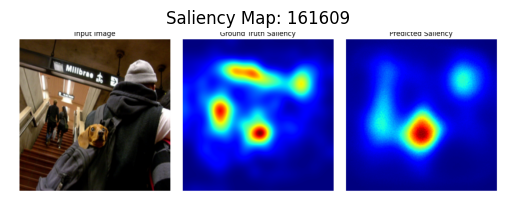

Metrics for Image ID 161609:
📉 MSE: 0.0185
📊 Pearson Correlation: 0.7204
🎯 AUC: 0.8692


In [21]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the image ID
image_id = "161609"  # Use the same ID for both metrics and image loading

# Define the base path to the directory containing the images
image_dir = "/Users/nouira/Desktop/Predicted_saliency_maps"

# Construct the full image filename using the ID
image_filename = f"saliency_{image_id}.png"
image_path = f"{image_dir}/{image_filename}"

# Load the image using PIL
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Saliency Map: {image_id}")
plt.axis('off')  # Hide the axes
plt.show()



# Check if the image ID exists in the results and print metrics
if image_id in results["image_metrics"]:
    print(f"Metrics for Image ID {image_id}:")
    print(f"📉 MSE: {results['image_metrics'][image_id]['mse']:.4f}")
    print(f"📊 Pearson Correlation: {results['image_metrics'][image_id]['pearson_corr']:.4f}")
    print(f"🎯 AUC: {results['image_metrics'][image_id]['auc']:.4f}")
else:
    print(f"Image ID {image_id} not found in the validation data.")

In this example of Image ID 161609 the metrics indicate solid but not perfect performance. The MSE of 0.0185 suggests some small deviations between predicted and actual saliency values. The Pearson Correlation of 0.7204 reflects a reasonably strong linear relationship, showing the model captures significant patterns in the data. The AUC of 0.8692 demonstrates good discriminative ability, meaning the model effectively distinguishes salient regions. Overall, the model performs well but has room for refinement.

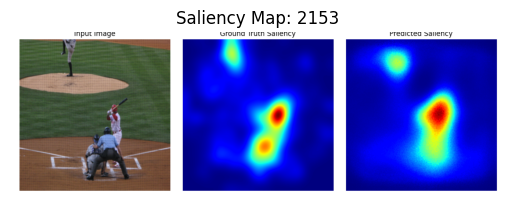

Metrics for Image ID 2153:
📉 MSE: 0.0045
📊 Pearson Correlation: 0.9070
🎯 AUC: 0.9837


In [17]:

import matplotlib.pyplot as plt
from PIL import Image

# Define the image ID
image_id = "2153"  # Use the same ID for both metrics and image loading

# Define the base path to the directory containing the images
image_dir = "/Users/nouira/Desktop/Predicted_saliency_maps"

# Construct the full image filename using the ID
image_filename = f"saliency_{image_id}.png"
image_path = f"{image_dir}/{image_filename}"

# Load the image using PIL
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Saliency Map: {image_id}")
plt.axis('off')  # Hide the axes
plt.show()



# Check if the image ID exists in the results and print metrics
if image_id in results["image_metrics"]:
    print(f"Metrics for Image ID {image_id}:")
    print(f"📉 MSE: {results['image_metrics'][image_id]['mse']:.4f}")
    print(f"📊 Pearson Correlation: {results['image_metrics'][image_id]['pearson_corr']:.4f}")
    print(f"🎯 AUC: {results['image_metrics'][image_id]['auc']:.4f}")
else:
    print(f"Image ID {image_id} not found in the validation data.")

The metrics for Image ID 2153 indicate excellent performance. The MSE of 0.0045 is very low, showing minimal deviation between predicted and actual saliency values. The Pearson Correlation of 0.9070 reflects a strong linear relationship, indicating the model captures the patterns in the data very effectively. The AUC of 0.9837 demonstrates outstanding discriminative ability, meaning the model is highly accurate in distinguishing salient regions. Overall, the model performs exceptionally well for this image.

## Plotting the dostributions of MSE, Pearson coorelation and AUC

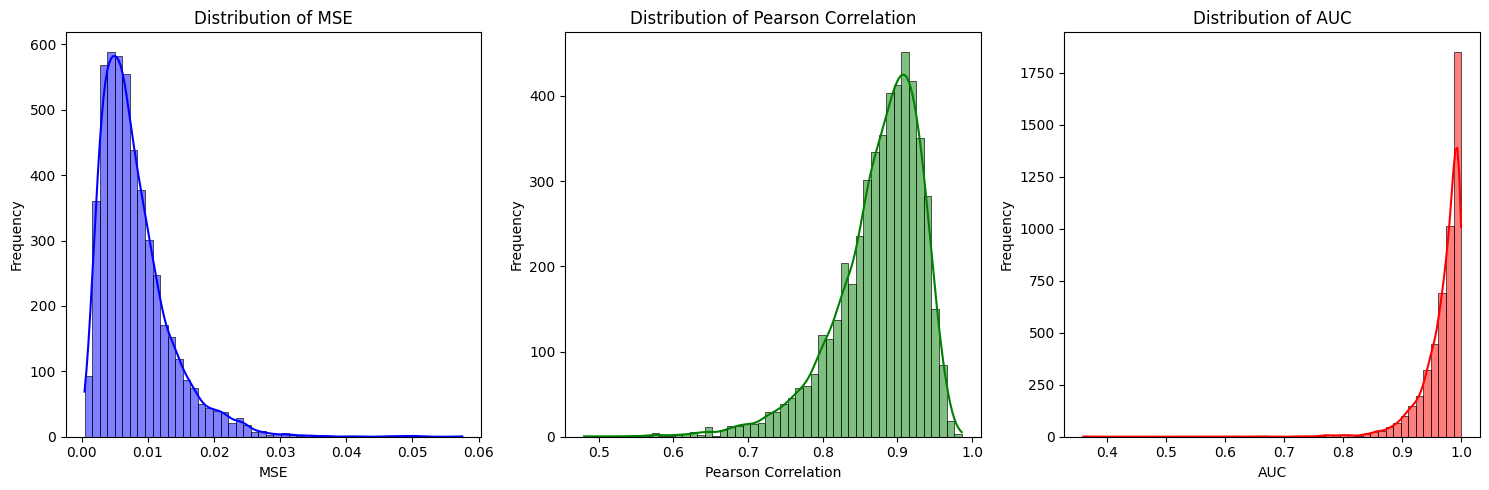

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract metrics into a DataFrame
data = {
    "image_id": list(results["image_metrics"].keys()),
    "mse": [results["image_metrics"][img]["mse"] for img in results["image_metrics"]],
    "pearson_corr": [results["image_metrics"][img]["pearson_corr"] for img in results["image_metrics"]],
    "auc": [results["image_metrics"][img]["auc"] for img in results["image_metrics"]]
}

df = pd.DataFrame(data)

# Plot distributions
plt.figure(figsize=(15, 5))

# MSE Distribution
plt.subplot(1, 3, 1)
sns.histplot(df["mse"], bins=50, kde=True, color="blue")
plt.title("Distribution of MSE")
plt.xlabel("MSE")
plt.ylabel("Frequency")

# Pearson Correlation Distribution
plt.subplot(1, 3, 2)
sns.histplot(df["pearson_corr"], bins=50, kde=True, color="green")
plt.title("Distribution of Pearson Correlation")
plt.xlabel("Pearson Correlation")
plt.ylabel("Frequency")

# AUC Distribution
plt.subplot(1, 3, 3)
sns.histplot(df["auc"], bins=50, kde=True, color="red")
plt.title("Distribution of AUC")
plt.xlabel("AUC")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The MSE distribution indicates that most errors are concentrated at lower values, suggesting generally accurate predictions. The Pearson Correlation distribution shows a peak around 0.8 to 0.9, reflecting a strong linear relationship between predicted and actual saliency maps. The AUC distribution demonstrates high values, indicating excellent discriminative ability.

## Sorting out the model's best 10 predictions based on the MSE loss

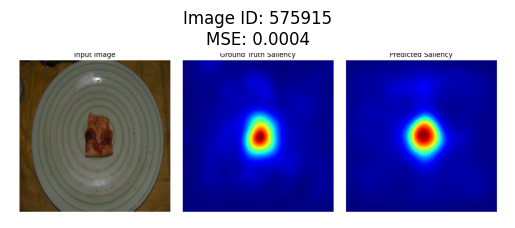

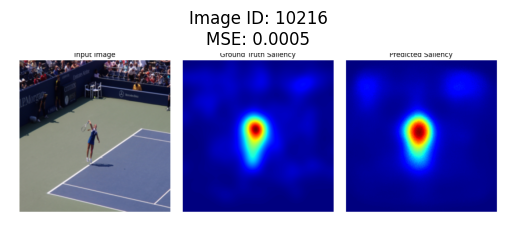

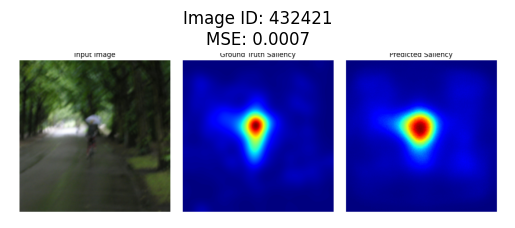

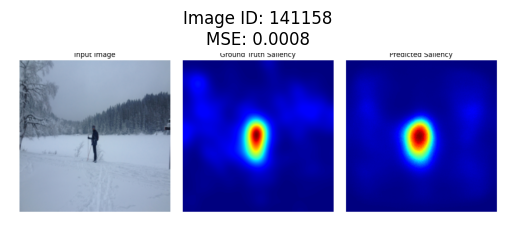

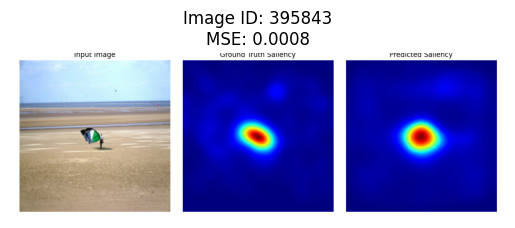

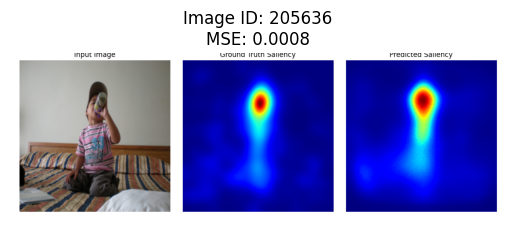

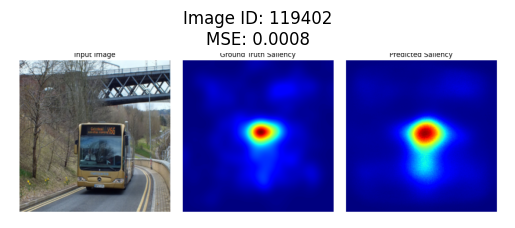

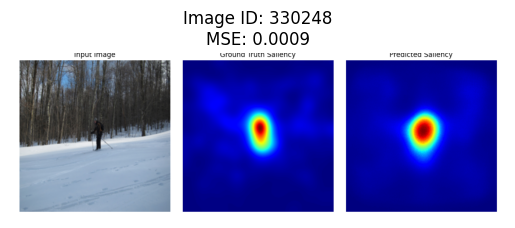

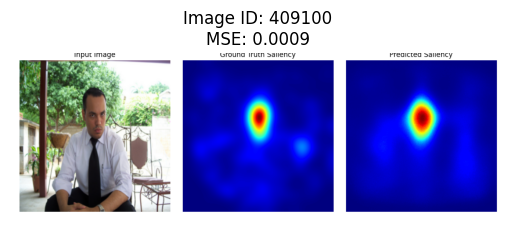

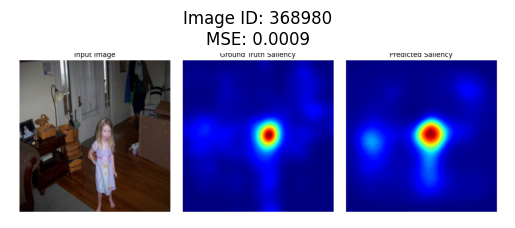

In [26]:
# Sort by MSE (lowest to highest)
top_performers = df.sort_values(by="mse").head(10)

# Display saliency maps for top performers
for image_id in top_performers["image_id"]:
    image_path = f"/Users/nouira/Desktop/Predicted_saliency_maps/saliency_{image_id}.png"  # Update path
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Image ID: {image_id}\nMSE: {results['image_metrics'][image_id]['mse']:.4f}")
    plt.axis('off')
    plt.show()